# Convolutional Neural Networks - MNIST Digit Recognition

## Preparations

In [ ]:
import numpy as np
import tensorflow as tf

from pyMLaux import plot_history, read_MNIST, show_img_data,  show_img, evaluate_classification_result, create_data_from_testimage

In [5]:
tf.get_logger().setLevel('ERROR')

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [6]:
train_y, train_x = read_MNIST('train', path=data_dir)
test_y, test_x = read_MNIST('test', path=data_dir)

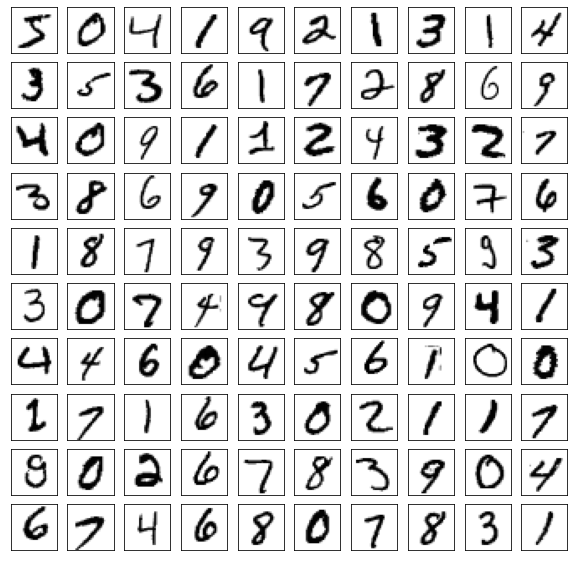

In [7]:
show_img_data(train_x, no=100, layout=(10, 10), interpolation=None)

## Create Model

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(train_x.shape[1], train_x.shape[2], train_x.shape[3]), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                    

## Train Model

In [10]:
history = model.fit(x=train_x, y=train_y, epochs=25, batch_size=32, validation_split=0.1)

Epoch 1/25
1688/1688 [==============================] - 22s 7ms/step - loss: 0.2982 - accuracy: 0.9060 - val_loss: 0.0377 - val_accuracy: 0.9887
Epoch 2/25
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0995 - accuracy: 0.9717 - val_loss: 0.0343 - val_accuracy: 0.9905
Epoch 3/25
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0724 - accuracy: 0.9802 - val_loss: 0.0386 - val_accuracy: 0.9903
Epoch 4/25
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0588 - accuracy: 0.9833 - val_loss: 0.0447 - val_accuracy: 0.9897
Epoch 5/25
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0510 - accuracy: 0.9852 - val_loss: 0.0323 - val_accuracy: 0.9908
Epoch 6/25
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0446 - accuracy: 0.9871 - val_loss: 0.0390 - val_accuracy: 0.9907
Epoch 7/25
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0407 - accuracy: 0.9881 - val_loss: 0.0350 - val_ac

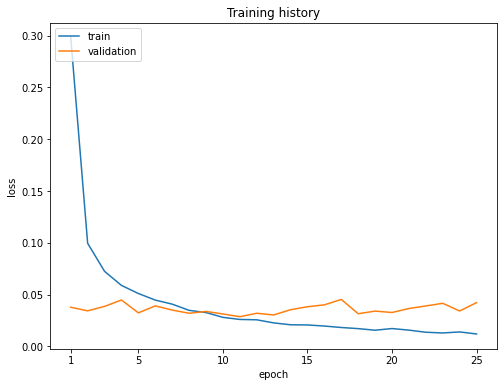

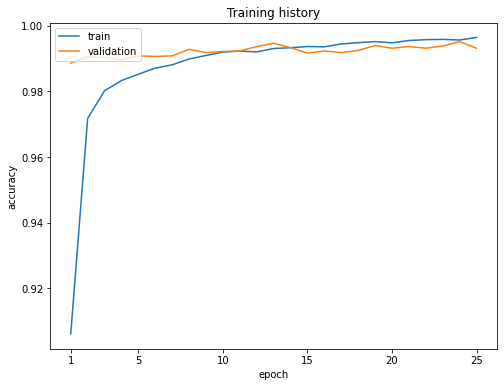

In [11]:
plot_history(history)

In [12]:
model.save(base_dir + 'Work/models/My_Model.hdf5')

## Evaluate on Test Data

In [13]:
pred = model.predict(test_x)

313/313 [==============================] - 1s 2ms/step


In [14]:
evaluate_classification_result(test_y, pred);

[[ 976    0    0    0    0    0    2    1    1    0]
 [   0 1133    0    1    0    0    0    1    0    0]
 [   1    0 1026    0    0    0    1    4    0    0]
 [   0    0    0 1007    0    2    0    0    1    0]
 [   0    0    0    0  980    0    0    0    0    2]
 [   0    0    0    3    0  887    1    1    0    0]
 [   1    2    0    0    1    0  952    0    2    0]
 [   0    2    2    0    1    0    0 1021    0    2]
 [   1    0    0    1    0    0    0    0  971    1]
 [   0    0    0    1    4    2    0    0    2 1000]]


Class 0:
    Sensitivity (TPR):  99.592% (976 of 980)
    Specificity (TNR):  99.967% (9017 of 9020)
    Precision:          99.694% (976 of 979)
    Neg. pred. value:   99.956% (9017 of 9021)
Class 1:
    Sensitivity (TPR):  99.824% (1133 of 1135)
    Specificity (TNR):  99.955% (8861 of 8865)
    Precision:          99.648% (1133 of 1137)
    Neg. pred. value:   99.977% (8861 of 8863)
Class 2:
    Sensitivity (TPR):  99.419% (1026 of 1032)
    Specificity (TNR)

## Try on Self-made Data

In [15]:
mytest_x, mytest_y, warped_img = create_data_from_testimage(data_dir + 'testimage.jpg', thicken=6)

(2800, 2000)


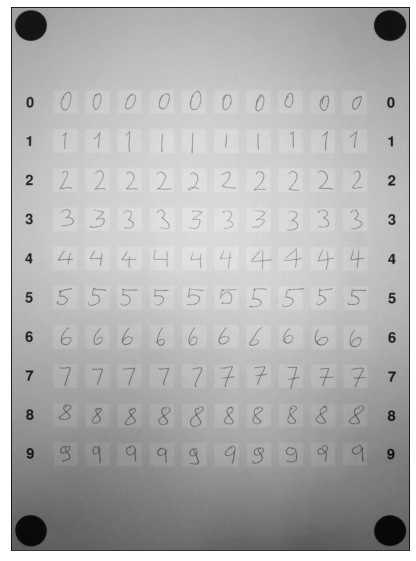

In [16]:
show_img(warped_img)

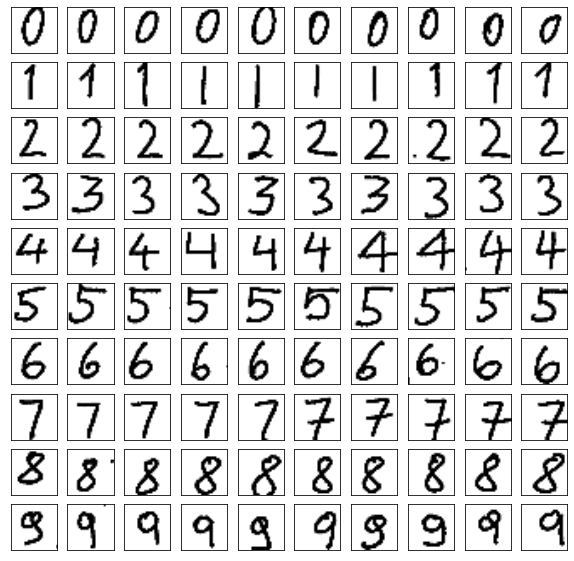

In [17]:
show_img_data(mytest_x, no=100, layout=(10, 10))

In [18]:
pred = model.predict(mytest_x)

4/4 [==============================] - 0s 32ms/step


In [19]:
evaluate_classification_result(mytest_y, pred);

[[ 8  0  0  0  1  0  1  0  0  0]
 [ 0  7  0  2  0  0  0  1  0  0]
 [ 0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  1  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0 10]]


Class 0:
    Sensitivity (TPR):  80.000% (8 of 10)
    Specificity (TNR): 100.000% (90 of 90)
    Precision:         100.000% (8 of 8)
    Neg. pred. value:   97.826% (90 of 92)
Class 1:
    Sensitivity (TPR):  70.000% (7 of 10)
    Specificity (TNR): 100.000% (90 of 90)
    Precision:         100.000% (7 of 7)
    Neg. pred. value:   96.774% (90 of 93)
Class 2:
    Sensitivity (TPR): 100.000% (10 of 10)
    Specificity (TNR): 100.000% (90 of 90)
    Precision:         100.000% (10 of 10)
    Neg. pred. value:  100.000% (90 of 90)
Class 3:
    Sensitivity (TPR): 100.000% (10 of 10)
    Specificity (TNR):  97.778% (88 of 90)
    Precision:          83.333% (10

In [20]:
np.save(data_dir + 'My_Data', mytest_x)

In [21]:
!cd $notebook_dir; jupyter nbconvert --to html CNN_MNIST.ipynb

[NbConvertApp] Converting notebook CNN_MNIST.ipynb to html
[NbConvertApp] Writing 881300 bytes to CNN_MNIST.html
